# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [145]:
column_names = ['City','Lon','Lat','Max temp','Humidity','Cloudiness','Wind Speed','Country','Date']
City_info = pd.DataFrame(columns = column_names)

print('Beginning Data Retrieval')
print('-----------------------------')

for i in range(len(cities)):
#for i in range(5):
    url = 'http://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(cities[i],weather_api_key)
    res = requests.get(url)
    time.sleep(3)
    if res.status_code == 200:
        print('Processing Record ' + str(i) + '| ' + cities[i] )    
        dictr = res.json()
        temp_list = [cities[i],
                     dictr['coord']['lon'],
                     dictr['coord']['lat'],
                     dictr['main']['temp_max'],
                     dictr['main']['humidity'],
                     dictr['clouds']['all'],
                     dictr['wind']['speed'],
                     dictr['sys']['country'],
                     dictr['dt']             
                    ]
        #print(temp_list)
        df_length = len(City_info)
        City_info.loc[df_length] = temp_list
    elif res.status_code == 404:
        print ('City not found. Skipping ...')
    else:
        print (res)


Beginning Data Retrieval
-----------------------------
Processing Record 0| cape town
Processing Record 1| acapulco
Processing Record 2| port elizabeth
Processing Record 3| bilibino
Processing Record 4| saskylakh
Processing Record 5| jiwani
Processing Record 6| mataura
Processing Record 7| ushuaia
Processing Record 8| guarapari
Processing Record 9| zhezkazgan
Processing Record 10| provideniya
Processing Record 11| hervey bay
Processing Record 12| east london
Processing Record 13| petropavlovsk-kamchatskiy
Processing Record 14| mahon
Processing Record 15| yulara
City not found. Skipping ...
Processing Record 17| cidreira
Processing Record 18| barrow
Processing Record 19| tabory
Processing Record 20| rikitea
Processing Record 21| sept-iles
Processing Record 22| mbanza-ngungu
Processing Record 23| bethel
City not found. Skipping ...
Processing Record 25| puerto ayora
Processing Record 26| moen
Processing Record 27| jamestown
Processing Record 28| monastyryshche
Processing Record 29| tiksi

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?q=tondano&appid=14d356fbd9482cf5bae5ca450bd46e56 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000217FE4A8CA0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [146]:
City_info = City_info.astype({'Humidity':'int32','Cloudiness':'int32', 'Date':'float64'})


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
City_info.head()

,City,Lon,Lat,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,18.4232,-33.9258,292.59,72,0,6.69,ZA,1.612754e+09
1,acapulco,-99.8901,16.8634,300.15,74,20,4.12,MX,1.612755e+09
2,port elizabeth,25.5701,-33.9180,291.15,77,0,7.20,ZA,1.612755e+09
3,bilibino,166.4372,68.0546,255.55,79,0,2.98,RU,1.612755e+09
4,saskylakh,114.0833,71.9167,235.18,80,42,4.71,RU,1.612754e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [148]:
City_info.describe()

,Lon,Lat,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,8.300000e+01
mean,18.771964,14.046057,279.959759,75.421687,58.566265,3.976747,1.612755e+09
std,103.732116,42.905406,19.916570,18.782530,38.834606,2.653416,1.065160e+02
min,-175.200000,-54.800000,235.180000,16.000000,0.000000,0.510000,1.612754e+09
25%,-67.604000,-25.269600,265.345000,69.000000,20.000000,1.955000,1.612755e+09
50%,25.570100,17.971600,289.150000,79.000000,75.000000,3.210000,1.612755e+09
75%,125.346250,52.304200,296.315000,88.500000,92.000000,5.540000,1.612755e+09
max,169.846400,77.484000,308.150000,100.000000,100.000000,11.320000,1.612755e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [149]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

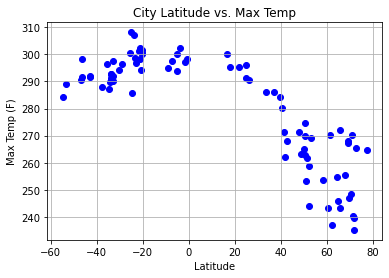

In [152]:
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.scatter(City_info['Lat'], City_info['Max temp'], marker="o", color="blue")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

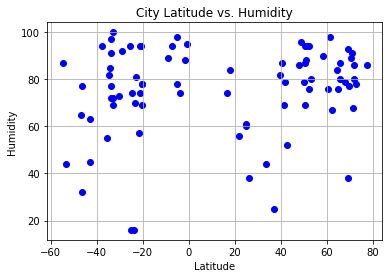

In [153]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(City_info['Lat'], City_info['Humidity'], marker="o", color="blue")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

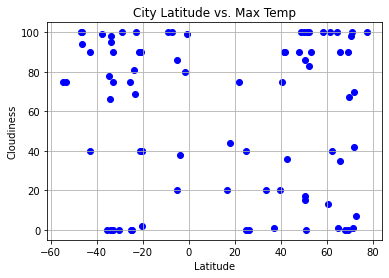

In [154]:
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(City_info['Lat'], City_info['Cloudiness'], marker="o", color="blue")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

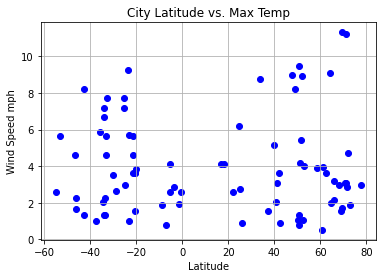

In [155]:
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")

plt.scatter(City_info['Lat'], City_info['Wind Speed'], marker="o", color="blue")
plt.grid()
plt.show()

## Linear Regression

In [170]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.title(x_values.name +' Vs '+ y_values.name)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

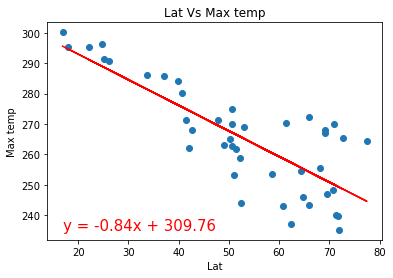

In [171]:
N_Hemi = City_info[City_info['Lat'] > 0]
S_Hemi = City_info[City_info['Lat'] < 0]
linear_reg_plot(N_Hemi['Lat'],N_Hemi['Max temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

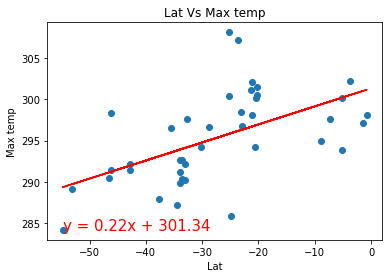

In [172]:
linear_reg_plot(S_Hemi['Lat'],S_Hemi['Max temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

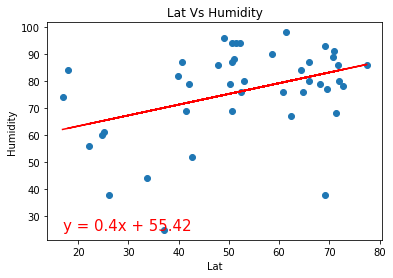

In [173]:
linear_reg_plot(N_Hemi['Lat'],N_Hemi['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

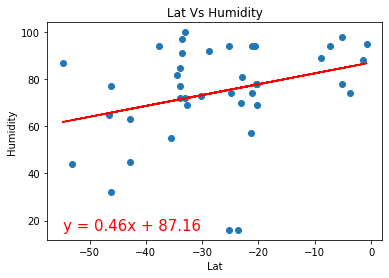

In [174]:
linear_reg_plot(S_Hemi['Lat'],S_Hemi['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

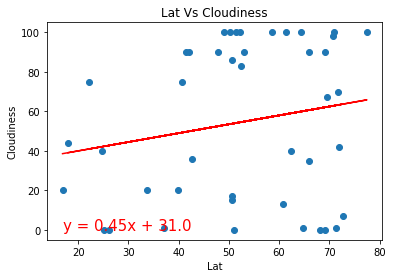

In [175]:
linear_reg_plot(N_Hemi['Lat'],N_Hemi['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

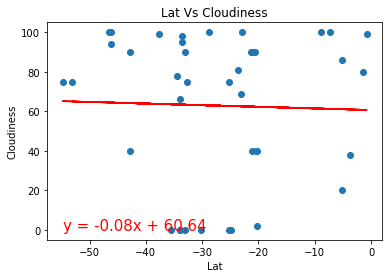

In [176]:
linear_reg_plot(S_Hemi['Lat'],S_Hemi['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

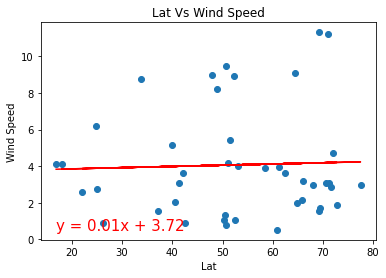

In [178]:
linear_reg_plot(N_Hemi['Lat'],N_Hemi['Wind Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

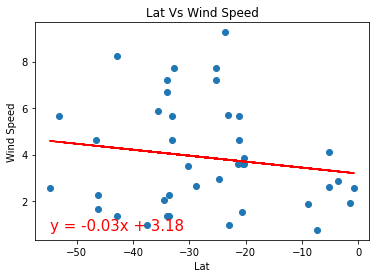

In [179]:
linear_reg_plot(S_Hemi['Lat'],S_Hemi['Wind Speed'])